# **Binary Prediction of Poisonous Mushrooms Competition**

<center>
    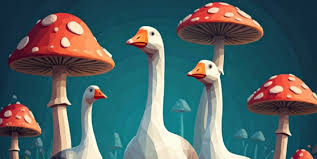
</center>

![]()

## **1.Problem Definition** : 

### **A. Overview** : 

**In this competition, we are tasked with developing a machine learning model to classify mushrooms as either edible or poisonous based on their physical characteristics. The dataset provided is based on a deep learning model trained on the UCI Mushroom dataset, with feature distributions that are similar, but not identical, to the original dataset. Competitors are encouraged to explore the differences and consider incorporating the original UCI dataset to potentially improve model performance.**

### **B. Problem Statement** :

**The objective is to accurately predict whether a given mushroom is edible or poisonous using its physical characteristics as features. This binary classification problem is crucial for ensuring safety in foraging and consumption of wild mushrooms. The challenge includes handling categorical features, some of which may not be found in the original dataset, adding complexity to the model development process.**

### **C. Measurable Success Metrics**

#### **i. Primary Metric** :

* **Accuracy**: The proportion of correctly classified instances (both edible and poisonous) over the total number of instances. This will be the primary metric used to evaluate model performance.

#### **ii. Secondary Metrics** :

* **F1 Score**: The harmonic mean of precision and recall, especially important in cases where the classes might be imbalanced.
* **AUC-ROC Curve**: This metric helps in evaluating the model's ability to distinguish between the classes across different thresholds.

#### **iii. Success Criteria** :

* The model should achieve a minimum accuracy of 95% on the validation set to be considered successful, with higher scores indicating better performance.
* F1 Score and AUC-ROC values should be maximized, with the aim of maintaining a balance between precision and recall, ensuring that neither edible nor poisonous mushrooms are disproportionately misclassified.

## **2. Data Understanding** : 

In [1]:
import pandas as pd

In [2]:
# df_train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")

In [3]:
# df_test = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [5]:
df_train.shape   

(3116945, 22)

In [6]:
df_train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

### **A. Dataset Overview** :

**The dataset consists of several features related to the physical characteristics of mushrooms. These features will be used to predict whether a mushroom is edible or poisonous (the target variable). Below is a brief description of each feature:**

* `id`: A unique identifier for each mushroom sample.
* `class`: The target variable indicating whether the mushroom is edible (e) or poisonous (p).
* `cap-diameter`: Numerical feature representing the diameter of the mushroom cap.
* `cap-shape`: Categorical feature describing the shape of the mushroom cap.
* `cap-surface`: Categorical feature describing the surface texture of the mushroom cap.
* `cap-color`: Categorical feature describing the color of the mushroom cap.
* `does-bruise-or-bleed`: Categorical feature indicating whether the mushroom bruises or bleeds when handled.
* `gill-attachment`: Categorical feature describing how the gills are attached to the mushroom stem.
* `gill-spacing`: Categorical feature describing the spacing of the gills.
* `gill-color`: Categorical feature describing the color of the gills.
* `stem-height`: Numerical feature representing the height of the mushroom stem.
* `stem-width`: Numerical feature representing the width of the mushroom stem.
* `stem-root`: Categorical feature describing the root type of the stem.
* `stem-surface`: Categorical feature describing the surface texture of the stem.
* `stem-color`: Categorical feature describing the color of the stem.
* `veil-type`: Categorical feature describing the type of veil covering the mushroom.
* `veil-color`: Categorical feature describing the color of the veil.
* `has-ring`: Categorical feature indicating whether the mushroom has a ring on the stem.
* `ring-type`: Categorical feature describing the type of ring on the stem.
* `spore-print-color`: Categorical feature describing the color of the spore print.
* `habitat`: Categorical feature describing the type of environment where the mushroom is typically found.
* `season`: Categorical feature indicating the season during which the mushroom is found.

<center>
    <img src="https://i.pinimg.com/736x/74/be/a2/74bea2a0e5481659b2dc9b88fd15538f.jpg" style="max-width: 100%; height: auto;"/>
</center>


### **B. Initial Observations** :

* The dataset includes both numerical and categorical features. The numerical features (`cap-diameter`, `stem-height`, `stem-width`) may require normalization or scaling.
* Several categorical features may have values not present in the original UCI Mushroom dataset, which could require special handling during preprocessing.
* The target variable (class) is binary, which simplifies the problem to a binary classification task.

### **C. Potential Challenges** :

* Handling categorical variables, especially those with new or unexpected categories.
* Balancing the dataset if there is any class imbalance between edible and poisonous mushrooms.
* Ensuring that the features are appropriately preprocessed, such as encoding categorical variables and scaling numerical ones.

## **3. Data Preprocessing** : 

### **A. Handling Inconsistent or Erroneous Values** :

In [7]:
# List of categorical columns to process
categorical_columns = ['cap-shape', 'cap-surface', 'cap-color','does-bruise-or-bleed', 'gill-attachment', 'gill-spacing'
                      ,'gill-color', 'stem-root', 'stem-surface','stem-color','veil-type','veil-color','has-ring',
                       'ring-type','spore-print-color','habitat'
                      ] 

In [8]:
# List of numerical columns to process
numerical_columns = ['cap-diameter', 'stem-height', 'stem-width']  

#### **i. Unique Values for every categorical data** :

In [9]:
for column in categorical_columns:
    print("column : ",column,"\nunique values : ",df_train[column].unique(),"\n")

column :  cap-shape 
unique values :  ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06'] 

column :  cap-surface 
unique values :  ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '4.93' 

#### **ii. Mushroom Dataset Category Descriptions** :

This document provides a description of the categories and their respective values used in the mushroom dataset.

##### 1. Cap Shape (`cap-shape`)
- **f**: Flat
- **x**: Convex
- **p**: Bell
- **b**: Knobbed
- **o**: Oval
- **c**: Cylindrical
- **s**: Sunken

##### 2. Cap Surface (`cap-surface`)
- **s**: Smooth
- **h**: Fibrous
- **y**: Scaly
- **l**: Silky

##### 3. Cap Color (`cap-color`)
- **u**: Purple
- **o**: Orange
- **b**: Buff
- **g**: Gray
- **w**: White
- **n**: Brown
- **e**: Red
- **y**: Yellow
- **r**: Green
- **p**: Pink
- **k**: Black

##### 4. Does Bruise or Bleed (`does-bruise-or-bleed`)
- **f**: No
- **t**: Yes

##### 5. Gill Attachment (`gill-attachment`)
- **a**: Attached
- **x**: Free
- **s**: Notched
- **d**: Decurrent

##### 6. Gill Spacing (`gill-spacing`)
- **c**: Close
- **d**: Crowded

##### 7. Gill Color (`gill-color`)
- **w**: White
- **n**: Brown
- **g**: Gray
- **k**: Black

##### 8. Stem Root (`stem-root`)
- **b**: Bulbous
- **c**: Club
- **r**: Rooted
- **s**: Scurfy
- **f**: Fibrous

##### 9. Stem Surface (`stem-surface`)
- **y**: Scaly
- **s**: Smooth
- **t**: Fibrous
- **g**: Grooved

##### 10. Stem Color (`stem-color`)
- **w**: White
- **o**: Orange
- **n**: Brown
- **y**: Yellow
- **e**: Red

##### 11. Veil Type (`veil-type`)
- **u**: Universal
- **d**: Partial

##### 12. Veil Color (`veil-color`)
- **n**: Brown
- **w**: White
- **k**: Black
- **y**: Yellow

##### 13. Has Ring (`has-ring`)
- **f**: No
- **t**: Yes

##### 14. Ring Type (`ring-type`)
- **f**: Flaring
- **z**: Large
- **e**: Evanescent
- **p**: Pendant

##### 15. Spore Print Color (`spore-print-color`)
- **k**: Black
- **w**: White
- **p**: Pink
- **n**: Brown

##### 16. Habitat (`habitat`)
- **d**: Woods
- **l**: Leaves
- **g**: Grasses
- **h**: Paths
- **p**: Urban
- **m**: Meadows
- **u**: Waste

In [10]:
import numpy as np

In [11]:
# Assuming df is your DataFrame
columns_to_clean = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
    'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
    'ring-type', 'spore-print-color', 'habitat'
]

In [12]:
# Define valid categories for each column
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': ['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-root': ['b', 'c', 'r', 's', 'f'],
    'stem-surface': ['y', 's', 't', 'g'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'veil-type': ['u', 'd'],
    'veil-color': ['n', 'w', 'k', 'y'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'spore-print-color': ['k', 'w', 'p', 'n'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']
}

In [13]:
# Replace unexpected values with NaN
for column in columns_to_clean:
    df_train[column] = df_train[column].apply(lambda x: x if x in valid_categories[column] else np.nan)
    df_test[column] = df_test[column].apply(lambda x: x if x in valid_categories[column] else np.nan)

### **B. Handling Missing Values** :

In [14]:
# Calculate the percentage of missing values for each feature
missing_percentage = df_train.isnull().mean() * 100

# Filter out columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Display the missing values percentage
print("Columns with missing values and their percentage:")
print(missing_percentage)

Columns with missing values and their percentage:
cap-diameter             0.000128
cap-shape                0.018191
cap-surface             66.566141
cap-color                1.280902
does-bruise-or-bleed     0.003754
gill-attachment         39.312789
gill-spacing            44.208640
gill-color              41.768045
stem-root               88.458603
stem-surface            74.039837
stem-color              10.521809
veil-type               94.886820
veil-color              88.685652
has-ring                 0.004588
ring-type               10.853929
spore-print-color       92.031749
habitat                  0.610277
dtype: float64


**Proportion of Missing Values:**

* **High Proportion**: If a large percentage of the values in a row (e.g., over 50%) are missing, it might be reasonable to remove that row. A row with significant missing data can introduce bias or skew analysis results.
* **Low Proportion**: If only a few values are missing, it might be better to impute or handle those missing values rather than removing the entire row.

<center>
    <img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/central-t_orig.jpg" style="max-width: 100%; height: auto;"/>
</center>


#### **i. Numerical features** :

In [15]:
for column in numerical_columns:
    df_train[column] = df_train[column].fillna(df_train[column].median())
    df_test[column] = df_test[column].fillna(df_test[column].median())

#### **i. Categorical features** :

In [16]:
categorical_columns_encoded = [value+"_encoded" for value in categorical_columns]

In [17]:
# Loop through each categorical column and impute missing values with the mode
for column in categorical_columns:
    mode_value = df_train[column].mode()[0]  # Get the mode of the column
    df_train[column] = df_train[column].fillna(mode_value)  # Replace missing values with mode
    mode_value_test = df_test[column].mode()[0]  # Get the mode of the column
    df_test[column] = df_test[column].fillna(mode_value_test)  # Replace missing values with mode

### **C. Encoding Categorical Variables** :

<center>
    <img src="https://ai-ml-analytics.com/wp-content/uploads/2021/02/Encoding.png" style="max-width: 100%; height: auto;"/>
</center>


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Process each categorical column
for column in categorical_columns:
    # Convert the column to string to handle mixed types
    df_train[column] = df_train[column].astype(str)
    
    # Apply Label Encoding
    df_train[column + '_encoded'] = label_encoder.fit_transform(df_train[column])
    
    # Convert the column to string to handle mixed types
    df_test[column] = df_test[column].astype(str)
    
    # Apply Label Encoding
    df_test[column + '_encoded'] = label_encoder.fit_transform(df_test[column])

In [20]:
# Fit and transform the target column
df_train['class'] = label_encoder.fit_transform(df_train['class'])

### **D. Scaling Numerical Variables** :

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
# Initialize RobustScaler
scaler = RobustScaler()

# Apply Robust Scaling to each numerical column
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])

### **E. Imbalanced Data Problem** :

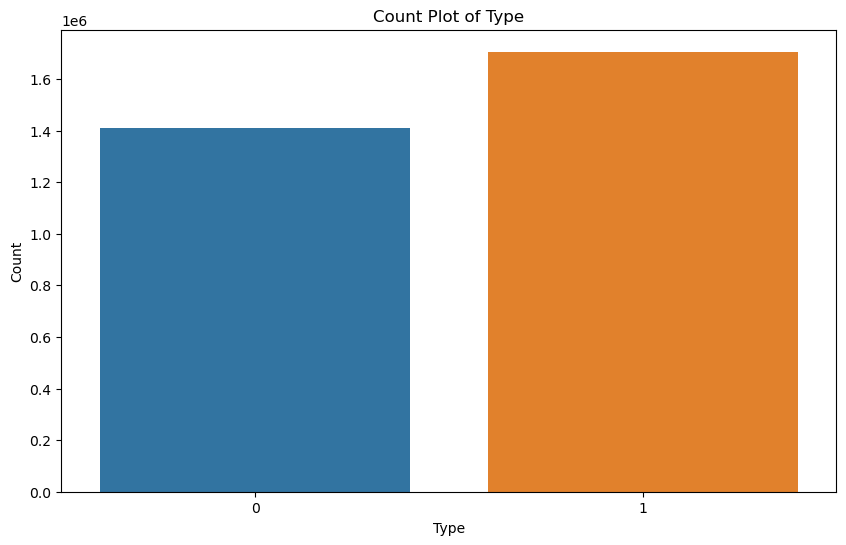

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a count plot for the 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df_train)

# Set title and labels
plt.title('Count Plot of Type')
plt.xlabel('Type')
plt.ylabel('Count');

#### **E-1. Holdout Cross-Validation** :

<center>
    <img src="https://miro.medium.com/v2/resize:fit:700/1*iZpmWiVeFn0bcuMZ_yiEdw.jpeg"/>
</center>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Combine features
columns = numerical_columns + categorical_columns_encoded
X = df_train[columns]
y = df_train['class']  

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<center>


#### **E-2. Synthetic Minority Over-samoling TEchnique(SMOTE)** :

<center>
    <img src="https://miro.medium.com/v2/resize:fit:850/1*QaNfJwU6P-VnG1zp3U4cVg.png"/>
</center>

In [27]:
!pip install imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## **4. Model Selection And Training** : 

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Initialize the Logistic Regression model with appropriate solver
model = RandomForestClassifier(random_state=42)

In [32]:
# Train the model
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

## **5. Model Evaluation** : 

In [33]:
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# Predict on the test set
y_pred = model.predict(X_test)
    
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [35]:
print("accuracy  :",accuracy)

accuracy  : 0.9883202943908218


In [36]:
print("repor : \n",report)

repor : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    282397
           1       0.99      0.99      0.99    340992

    accuracy                           0.99    623389
   macro avg       0.99      0.99      0.99    623389
weighted avg       0.99      0.99      0.99    623389



In [37]:
from sklearn.metrics import matthews_corrcoef

In [38]:
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient (MCC): {mcc}')

Matthews Correlation Coefficient (MCC): 0.9764466808490702


## **6. Model Deployment** :

In [39]:
test_pred_prob = model.predict(df_test[columns])

In [40]:
test_pred_prob

array([0, 1, 1, ..., 1, 0, 0])

In [41]:
test_pred_class = label_encoder.inverse_transform(test_pred_prob)

In [42]:
test_pred_class

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [46]:
df_sub=pd.read_csv("sample_submission.csv")

In [47]:
df_sub['class']= test_pred_class

In [48]:
df_sub.to_csv('submission.csv', index = False)

In [49]:
pd.read_csv('submission.csv')

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,p
4,3116949,e
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,p
2077962,5194907,e


<Axes: >

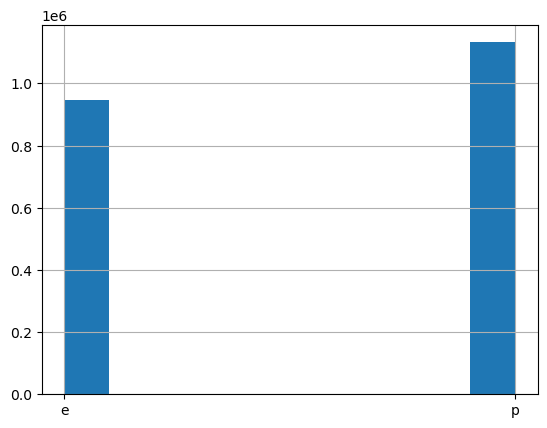

In [50]:
df_sub['class'].hist()

## **Refrences** :

<div style="
    background-color: #f0f8ff;
    border-radius: 10px;
    padding: 20px;
    margin: 20px 0;
    font-family: 'Arial', sans-serif;
    text-align: center;
    box-shadow: 0px 0px 15px rgba(0, 0, 0, 0.1);
">
    <h2 style="
        color: #4caf50;
        font-size: 24px;
        margin-bottom: 10px;
    ">👏😊 IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! 💢👏</h2>
    <p style="
        font-size: 18px;
        color: #555;
        margin: 0;
    ">
        🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 
        🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating 
        helpful content like this🖥🍱.
    </p>
</div>